# Jonswap Spectra

GODA (1985) in terms of $H_{S}$ and $T_{p}$

$$S(f)=\alpha\cdot H_{s}^{2} \cdot T_{p}^{-4} \cdot f^{-5} \cdot e^{-1.25 \cdot (T_{p} \cdot f)^{-4}} \cdot \gamma^{e^{-(T_{p} \cdot f - 1)^{2}/(2 \cdot \sigma^{2})}}$$


$$\alpha \approxeq \frac{0.0624}{0.230+0.0336 \cdot \gamma - 0.185 \cdot (1.9 + \gamma)^{-1}}$$

$$
\sigma=\begin{cases}
\sigma_{a};  f \leq f_{p} \\ \sigma_{b}; f \geq f_{p}
\end{cases}
$$

$\gamma$ = 1 to 7 (mean 3.3)

$\sigma_{a}\approxeq0.07, \sigma_{b}\approxeq 0.09$

In [1]:
# arrays
import numpy as np

# plots
import matplotlib.pyplot as plt

# panel interaction
import panel as pn
pn.extension() # this is very important for notebook display


In [2]:
def plotJonswap(f, Sf):
    
    fig = plt.figure(figsize=(7,7))
    plt.plot(f, Sf, c='b')
    plt.fill_between(f, np.full(len(f), 0), Sf, color='b', alpha=0.3)
    plt.xlim(1/30, 1)
    plt.ylim(0, 100)
    plt.title('JONSWAP Spectra')
    plt.xlabel('$f$ (1/s)')
    plt.ylabel('$S(f)$ ($m^{2}\cdot s$)')
    plt.close()
    return(fig)

In [3]:
def JonswapSpec(Hs, Tp, gamma):
    'Evaluate the JONSWAP-gamma parameter of the wave spectrum defined by PSD=f(f, E)'
    
    f = np.linspace(1/30, 1, 200)
    fp = 1 / Tp
    sigma = np.where(f < fp, np.ones(len(f))*0.07, np.ones(len(f))*0.09) 

    # Calculate spectral shape
    Sf1 = (0.0624/(0.230 + 0.0336*gamma - 0.185 * (1.9 + gamma)**(-1))) * Hs**2 * Tp**(-4) * f**(-5)
    Sf2 = np.exp(-1.25 * (Tp * f)**(-4)) * gamma**(np.exp((-(Tp*f - 1)**2)/(2 * sigma)))
    Sf = Sf1 * Sf2
    
    # call figure to plot
    fig = plotJonswap(f, Sf)
    
    return(fig)

In [4]:
kw = dict(
    Hs=(0, 10, 0.5, 1.5), Tp=(0, 25, 1, 3), gamma=(1, 20, 1, 3)
)

In [5]:
i = pn.interact(JonswapSpec, **kw)

Column
    [0] Markdown(str)
    [1] Row
        [0] FloatSlider(end=10, name='Hs', step=0.5, value=1.5)
        [1] IntSlider(end=25, name='Tp', value=3)
        [2] IntSlider(end=20, name='gamma', start=1, value=3)
    [2] Row
        [0] Row
            [0] Matplotlib(Figure, name='interactive00101')
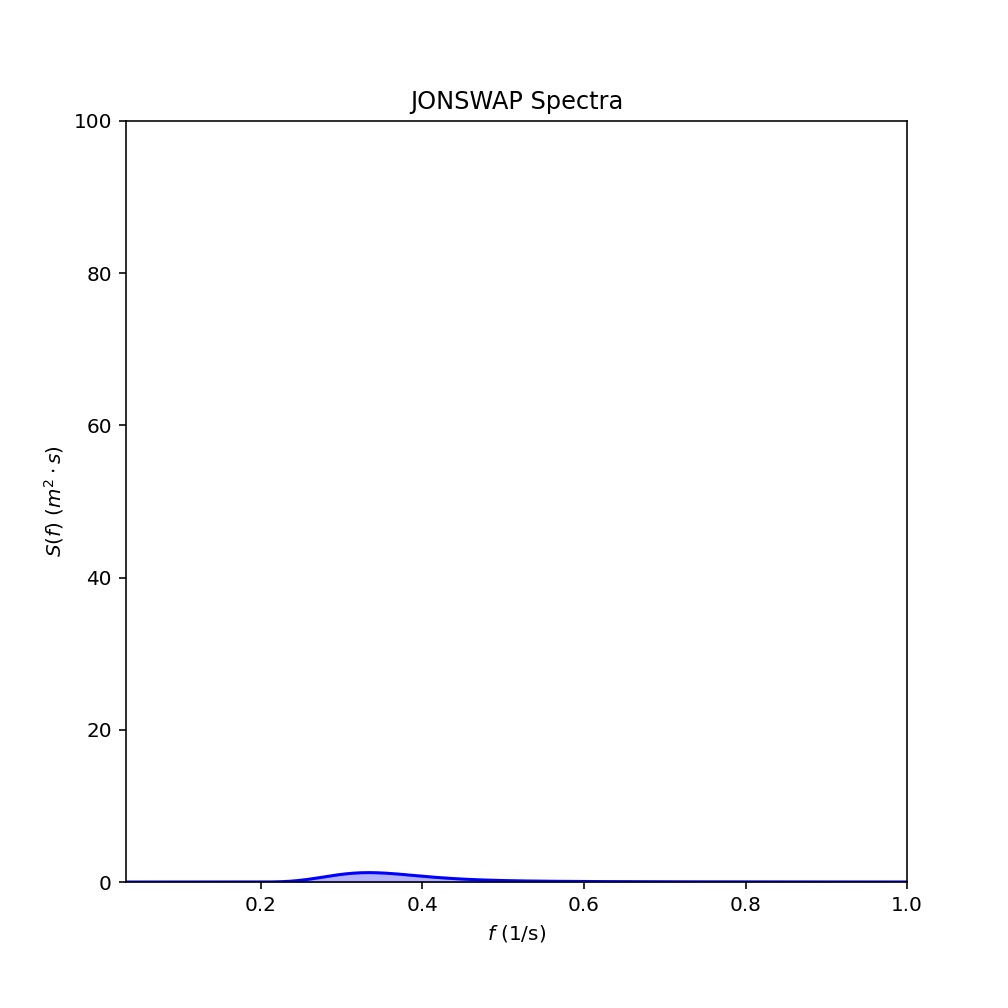

In [6]:
panel = pn.Column(
    '**Custom JONSWAP spectrum from Hs, Tp, and gamma parameters**',
    pn.Row(
        i[0][0],i[0][1],i[0][2]
    ),
    pn.Row(i[1])
)
panel